# How to cut out Target Pixel Files from Kepler Superstamps or TESS FFIs?

You can use `lightkurve` to cut Target Pixel Files (TPFs) out of a series of standard astronomical images, such as [K2 Superstamp Mosaics](https://archive.stsci.edu/prepds/k2superstamp/) or TESS Full-Frame-Images (FFIs).
This brief tutorial will demonstrate how!

Let's assume you have downloaded a set [simulated TESS FFI images](http://archive.stsci.edu/tess/ete-6.html) to a local directory called `data`. `lightkurve` will assume that the files are given in *time order*. So we'll sort the filenames first:

In [1]:
from glob import glob
import numpy as np
fnames = np.sort(glob('data/*.fits'))

Now we use the `KeplerTargetPixelFile` class and its function `from_fits_images()` to create the new TPF. This will cut out around the position keyword. You can pass a pixel position in units of the original image or RA and Dec coordinates.

In [5]:
from lightkurve import KeplerTargetPixelFile
from astropy.coordinates import SkyCoord
tpf = KeplerTargetPixelFile.from_fits_images(images=fnames, 
                                             position=SkyCoord(257.13700, 24.48958, unit='deg'), 
                                             size=(9,9),
                                             target_id='MyCutOut')

100%|██████████| 3/3 [00:00<00:00, 19.98it/s]


We then have a fully functioning `KeplerTargetPixelFile` object!  You can read more about such objects in the [tutorial on their use](https://docs.lightkurve.org/tutorials/1.02-target-pixel-files.html).

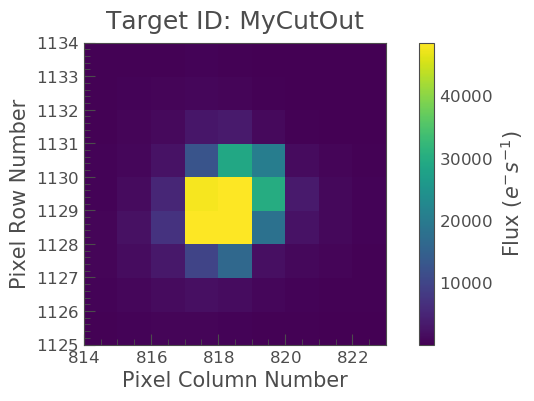

In [6]:
%matplotlib inline
tpf.plot();